In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [32]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [33]:
y.shape, tx.shape

((10000,), (10000, 2))

# Computing the Cost Function
Fill in the the `compute_cost` function below:

In [115]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE / MAE
    # ***************************************************
    #mse = 0
    #mae = 0
    #for i in range (0, len(y)):
    #    mse += ((y[i] - w[0] - tx[i][1]*w[1]) ** 2)
    #    mae += (y[i] - w[0] - tx[i][1]*w[1])

    e = y - np.dot(tx, w)
    mse1 = np.dot(np.transpose(e),e)
    mae1 = np.dot(e,np.ones(len(e)))

    #np.testing.assert_approx_equal(mse, mse1);
    #np.testing.assert_approx_equal(mae, mae1);

    return mse1
    raise NotImplementedError

# Grid Search

Fill in the function `grid_search()` below:

In [116]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i in range (0, len(w0)):
        for j in range (0, len(w1)):
            losses[i][j] = compute_loss(y, tx, [w0[i], w1[j]])

    return losses
    raise NotImplementedError

Let us play with the grid search demo now!

Grid Search: loss*=311174.0673721906, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.769 seconds


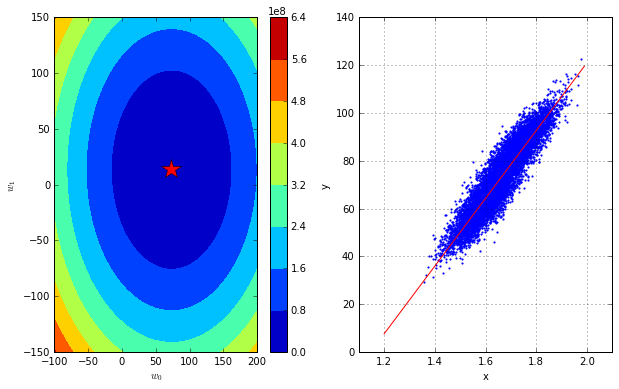

In [133]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [140]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    e = y - np.dot(tx, w)
    return (-1/len(y))*(np.dot(np.transpose(tx),e))
    raise NotImplementedError

Please fill in the functions `gradient_descent` below:

In [299]:
def gradient_descent(y, tx, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        grad = compute_gradient(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma*grad
        # store w and loss
        loss = compute_loss(y, tx, w)
        ws.append(np.copy(w))
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [315]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.1

# Initialization
w_initial = np.array([0.0, 0.0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/99): loss=45292701.120600075, w0=7.329392200210504, w1=1.3479712434989137
Gradient Descent(1/99): loss=36745554.281587616, w0=13.925845180399968, w1=2.561145362647917
Gradient Descent(2/99): loss=29822365.34198754, w0=19.86265286257048, w1=3.6530020698820245
Gradient Descent(3/99): loss=24214582.300911456, w0=25.205779776523947, w1=4.635673106392713
Gradient Descent(4/99): loss=19672278.037639838, w0=30.014593999082074, w1=5.520077039252335
Gradient Descent(5/99): loss=15993011.58438982, w0=34.34252679938438, w1=6.316040578825998
Gradient Descent(6/99): loss=13012805.757257305, w0=38.23766631965647, w1=7.032407764442294
Gradient Descent(7/99): loss=10598839.037279971, w0=41.743291887901336, w1=7.67713823149696
Gradient Descent(8/99): loss=8643525.994098332, w0=44.89835489932172, w1=8.257395651846164
Gradient Descent(9/99): loss=7059722.4291212, w0=47.73791160960007, w1=8.779627330160444
Gradient Descent(10/99): loss=5776841.541489724, w0=50.29351264885058, w1=9.24963

<function __main__.plot_figure>

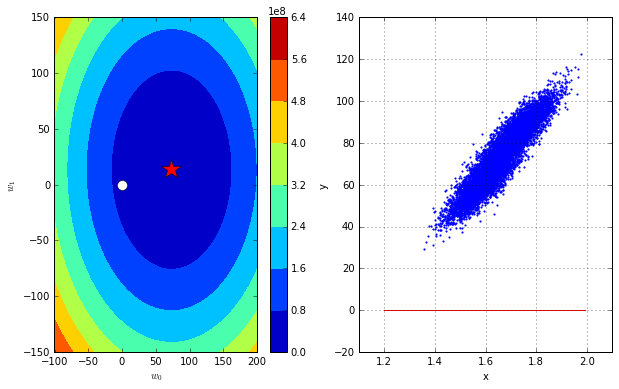

In [316]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# Stochastic gradient descent

In [317]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient for batch data."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.
    # ***************************************************                
    e = y - np.dot(tx, w)
    return (-1/len(y))*(np.dot(np.transpose(tx),e))

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_epochs, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = []
    w = initial_w
    n_iter = 0;
    for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
        grad = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
        w = w - gamma*grad
        loss = compute_loss(y, tx, w)
        ws.append(np.copy(w))
        losses.append(loss)
        n_iter = n_iter + 1
        if (n_iter == max_epochs):
            break
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_epochs - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [318]:
# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.1
batch_size = 10

# Initialization
w_initial = np.array([0.0, 0.0])

# Start SGD.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(1/99): loss=43862823.96265143, w0=7.8803218934503825, w1=4.729195801527808
Gradient Descent(2/99): loss=36023787.489040166, w0=14.239700004107151, w1=4.303338566323801
Gradient Descent(3/99): loss=29580346.86015666, w0=19.966691663028847, w1=4.343552703400327
Gradient Descent(4/99): loss=24246353.251014337, w0=25.08057699316989, w1=5.152833523106837
Gradient Descent(5/99): loss=19209932.327945653, w0=30.33178695577135, w1=6.810648833741816
Gradient Descent(6/99): loss=16654383.359271375, w0=33.94198238217498, w1=4.2011668410478
Gradient Descent(7/99): loss=13257768.996579587, w0=38.23927777265657, w1=5.34478515399351
Gradient Descent(8/99): loss=11305859.069745023, w0=41.47784722797642, w1=4.122815662880727
Gradient Descent(9/99): loss=9613715.112954844, w0=44.28411193553963, w1=4.044106706705487
Gradient Descent(10/99): loss=7556353.6637630435, w0=47.37474679757146, w1=6.195486508006159
Gradient Descent(11/99): loss=6468601.920912771, w0=49.73616500598695, w1=5.661752

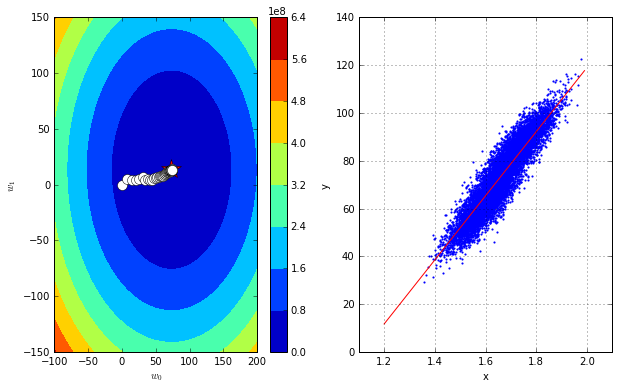

In [319]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))